# Import Libraries

In [1]:
from outgen import *
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt

In [2]:
print(outgen.name)
print(outgen.version)
print(iqr.add_outliers)
print(lof.add_outliers)

Outgen - the outlier generator
0.0.1 raptor
<function add_outliers at 0x7feda0ebf560>
<function add_outliers at 0x7feda0ebf950>


# Load Dataset

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data.data)

# Number of principle components, dimmensions to reduce to
pca = decomposition.PCA(n_components=2)

# Find the principle components, using the covarience matrix, eigen vectors 
pca_model = pca.fit(df)

# Transform the iris data
pca_array = pca_model.transform(df)

# Data frames are easier to work with than arrays
df = pd.DataFrame(data=pca_array, columns=['PC1','PC2'])

# Normalise
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)

df['class'] = pd.DataFrame(data.target, columns=['label'])

plt.figure(figsize=(5,5))
plt.title('Iris Dataset (2PC)')
plt.scatter(df['PC1'], df['PC2'], c=df['class'], cmap='rainbow', s=8)
plt.show()



# Add LOF Outliers

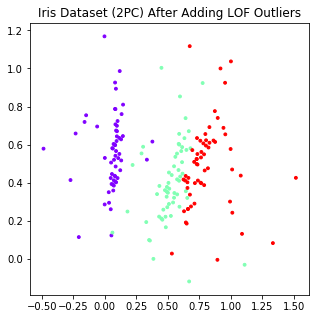

In [4]:
# class column must be the last column!
df_lof = lof.add_outliers(df, 10)

plt.figure(figsize=(5,5))
plt.title('Iris Dataset (2PC) After Adding LOF Outliers')
plt.scatter(df_lof['PC1'], df_lof['PC2'], c=df_lof['class'], cmap='rainbow', s=8)
plt.show()

# Add IQR Outliers

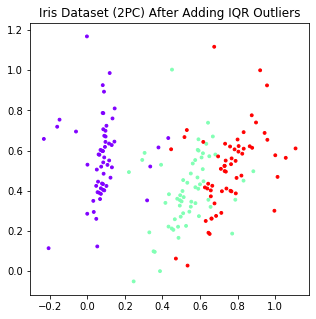

In [5]:
# class column must be the last column!
df_iqr = iqr.add_outliers(df, 10)

plt.figure(figsize=(5,5))
plt.title('Iris Dataset (2PC) After Adding IQR Outliers')
plt.scatter(df_iqr['PC1'], df_iqr['PC2'], c=df_iqr['class'], cmap='rainbow', s=8)
plt.show()

# Showing the Working of IQR

In [22]:
cluster_quartiles = iqr.find_quartiles_for_clusters(df, 75, 25)


#  Ranges nested list
#  [low / high]  [cluster]  [dimmension]

#[
#    # low
#    [[0.0655167092976424, 0.4243042994624981],
#      [0.487065146979687, 0.27740405311611016],
#      [0.6789223268500801, 0.3983925441245843]],
#     #high
#    [[0.0975035356734204, 0.6445567136796868],
#      [0.5934192376762724, 0.5023788945468531],
#      [0.816182670826261, 0.6130638007210382]]
#]

# Draw line on scatter
plt.figure(figsize=(18,18))
plt.title('Iris Dataset (2PC)')
plt.scatter(x=df['PC1'], y=df['PC2'], c=df['class'], cmap='rainbow', s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
# cluster 0         #  [q 1 or 3]  [cluster]  [dimmension]
plt.axvline(x=cluster_quartiles[0][0][0], color='purple', linestyle='-')
plt.axvline(x=cluster_quartiles[1][0][0], color='purple', linestyle='-')
plt.axhline(y=cluster_quartiles[0][0][1], color='purple', linestyle='-')
plt.axhline(y=cluster_quartiles[1][0][1], color='purple', linestyle='-')
# cluster 1
plt.axvline(x=cluster_quartiles[0][1][0], color='cyan', linestyle='-')
plt.axvline(x=cluster_quartiles[1][1][0], color='cyan', linestyle='-')
plt.axhline(y=cluster_quartiles[0][1][1], color='cyan', linestyle='-')
plt.axhline(y=cluster_quartiles[1][1][1], color='cyan', linestyle='-')
# cluster 2
plt.axvline(x=cluster_quartiles[0][2][0], color='red', linestyle='-')
plt.axvline(x=cluster_quartiles[1][2][0], color='red', linestyle='-')
plt.axhline(y=cluster_quartiles[0][2][1], color='red', linestyle='-')
plt.axhline(y=cluster_quartiles[1][2][1], color='red', linestyle='-')



# Loop over each label
for label in df[df.columns[-1]].unique():    
    print("For cluster: " + str(label))
    
    # calculate the center (mean) of data, to center the blobs at
    center = iqr.find_center(df[df[df.columns[-1]] == label])
    
    print("center: " + str(center))
    
    # create a guassian blob at the center piont, to draw outliers from
    blob = outils.create_blob(center, len(df.columns)-1, random_state=None)
    
    for outlier in blob:
        if(iqr.is_outlier(outlier, cluster_quartiles)):
            outs = 'y'
        else:
            outs = 'k'
        plt.scatter(x=outlier[0], y=outlier[1], c=outs, s=20)
    
    # Add true outliers, 
    #df = add_iqr_outliers(df, label, n_outliers, blob, cluster_quartiles)            



For cluster: 0
center: [0.08282534229893049, 0.5518109992320642]
For cluster: 1
center: [0.5352286517203751, 0.3865032904767533]
For cluster: 2
center: [0.7597480247668555, 0.5002150787203156]
